# MNE Loading and visualizing from sample datasets (Example: LIMO dataset)

In [1]:
# Install MNE
!pip3 install mne

In [2]:
import mne 
import numpy as np

### Download sample datasets

MNE has a selection of sample datasets in various formats (FIF, EEG, etc) which can be downloaded from their methods 

Some examples are shown here in commented out code (they are huge datasets and take a while!).

In [3]:
# # Neuromag raw fif files

# sample_data_folder = mne.datasets.sample.data_path()
# sample_data_raw_file = (
#     sample_data_folder / "MEG" / "sample" / "sample_audvis_filt-0-40_raw.fif"
# )
# raw = mne.io.read_raw_fif(sample_data_raw_file)

Large sample dataset: 3 GB after extraction

In [4]:
# ### EEG

# # BrainVision
# ssvep_folder = mne.datasets#.ssvep.data_path()
# ssvep_data_raw_path = (
#     ssvep_folder / "sub-02" / "ses-01" / "eeg" / "sub-02_ses-01_task-ssvep_eeg.vhdr"
# )
# ssvep_raw = mne.io.read_raw_brainvision(ssvep_data_raw_path, verbose=False)


Just for learning, let's take only a single subject from the [LIMO dataset](https://datashare.ed.ac.uk/handle/10283/2189)

We can select subjects numbered between 1 and 18




In [5]:
import numpy as np
import matplotlib.pyplot as plt

from mne.datasets.limo import load_data
from mne.viz import plot_events, plot_compare_evokeds
from mne import combine_evoked

subj = 1 # subject to use

Lets see how long it takes to load this dataset

In [6]:
%time limo_epochs = load_data(subject=subj)

c:\Users\sange\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


CPU times: total: 2.05 s
Wall time: 2.27 s


In [7]:
limo_epochs

Number of events,1055
Events,Face/A: 524Face/B: 531
Time range,-0.300 – 0.500 s
Baseline,off


The loaded dataset is of the type **EpochsArray**

In [8]:
type(limo_epochs)

mne.epochs.EpochsArray

You can see the channel names, events, and their ID

In [9]:
set(limo_epochs.ch_names)

{'A1',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A2',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A25',
 'A26',
 'A27',
 'A28',
 'A29',
 'A3',
 'A30',
 'A31',
 'A32',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'B1',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B18',
 'B19',
 'B2',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'B25',
 'B26',
 'B27',
 'B28',
 'B29',
 'B3',
 'B30',
 'B31',
 'B32',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B9',
 'C1',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C2',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'C3',
 'C30',
 'C31',
 'C32',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'D1',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'D16',
 'D17',
 'D18',
 'D19',
 'D2',
 'D20',
 'D21',
 'D22',
 'D23',
 'D24',
 'D25',
 'D26',
 'D27',
 'D28',
 'D29',
 'D3',
 'D30',
 'D31',
 'D32',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'EXG1',
 'E

In [10]:
limo_epochs.events

array([[   0,    0,    0],
       [   1,    0,    0],
       [   2,    0,    0],
       ...,
       [1052,    0,    1],
       [1053,    0,    1],
       [1054,    0,    1]])

In [11]:
limo_epochs.event_id

{'Face/A': 0, 'Face/B': 1}

Plotting events is easy!

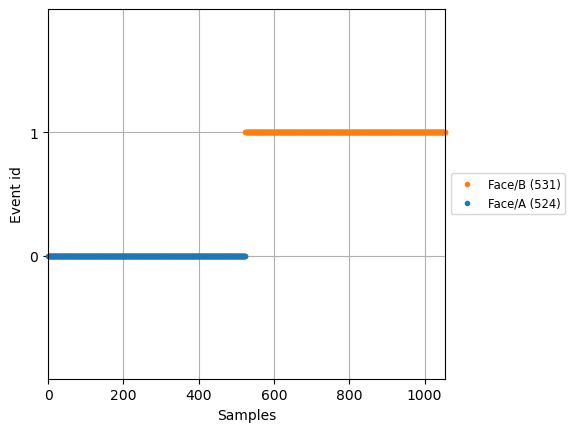

Text(0.5, 0.98, 'Distribution of events in LIMO epochs')

In [12]:
fig = plot_events(limo_epochs.events, event_id=limo_epochs.event_id)
fig.suptitle("Distribution of events in LIMO epochs")

Plot Event Related Potential Image

Not setting metadata
1055 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


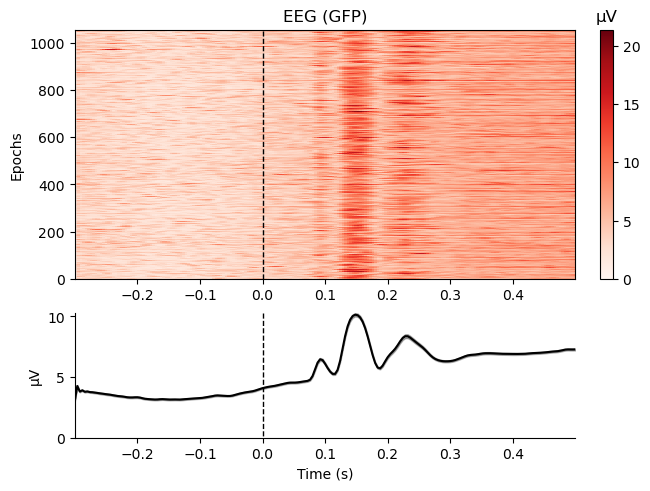

[<Figure size 640x480 with 3 Axes>]

In [13]:
limo_epochs.plot_image()

You can even specify event ID 

Not setting metadata
524 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


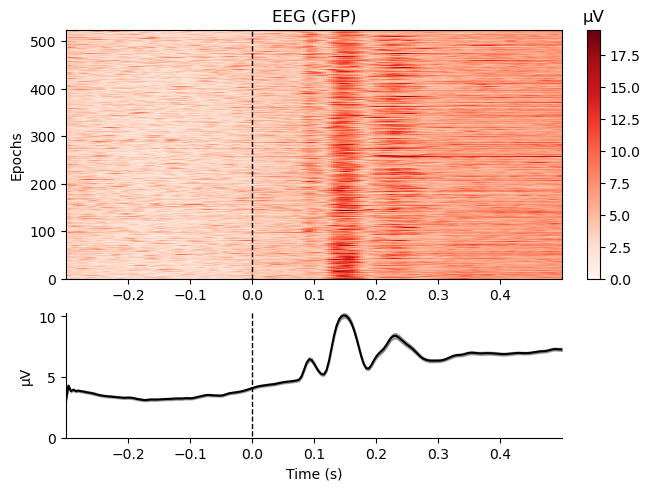

[<Figure size 640x480 with 3 Axes>]

In [14]:
limo_epochs["Face/A"].plot_image()

There's a lot more you can do with this!

In [15]:
limo_epochs.__dir__()

['_allow_empty',
 'event_id',
 'selection',
 'events',
 '_metadata',
 'drop_log',
 'detrend',
 '_raw',
 'picks',
 'info',
 '_current',
 'preload',
 '_data',
 '_do_baseline',
 '_offset',
 '_raw_times',
 '_times_readonly',
 'reject_tmin',
 'reject_tmax',
 '_decim',
 '_decim_slice',
 'baseline',
 'reject',
 'flat',
 '_bad_dropped',
 '_channel_type_idx',
 '_reject_time',
 '_do_delayed_proj',
 '_projector',
 '_filename',
 '_raw_sfreq',
 '_annotations',
 '__module__',
 '__doc__',
 '__init__',
 '_check_consistency',
 'reset_drop_log_selection',
 'load_data',
 'apply_baseline',
 '_reject_setup',
 '_is_good_epoch',
 '_detrend_offset_decim',
 'iter_evoked',
 'subtract_evoked',
 'average',
 'standard_error',
 '_compute_aggregate',
 '_name',
 '_get_name',
 '_evoked_from_epoch_data',
 'ch_names',
 'plot',
 'plot_topo_image',
 'drop_bad',
 'drop_log_stats',
 'plot_drop_log',
 'plot_image',
 'drop',
 '_get_epoch_from_raw',
 '_project_epoch',
 '_handle_empty',
 '_get_data',
 '_data_sel_copy_scale',
 '